# Introduction à Python II. Data processing

In this notebook, we learn the basics for data processing. Datas are usually stored in two dimensional arrays, such as an Excel spreadsheet (.xsls). We often use the format *comma separated value* (csv). In this format, data are simply separated by commas.


The Python library to load data is [pandas](https://pandas.pydata.org/). If the module is not installed on your computer, you may install it by typing on a terminal
`pip3 install pandas`

A useful cheat-sheet can be found here [ici](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

In [1]:
import pandas as pd
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


### 1. Series
The first important class in Pandas is **Series**. A series is composed of
- a one dimensional array
- labels
- other informations if needed.

Compare for instance the following code:

Text(0.5, 1.0, "ts is of type <class 'pandas.core.series.Series'>")

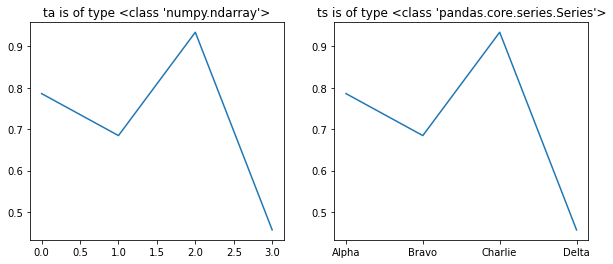

In [2]:
ta = rand(4) 
ts = pd.Series(ta, ["Alpha", "Bravo", "Charlie", "Delta"])

figsize(10, 4)
subplot(1,2,1)
plot(ta)
title("ta is of type {}".format( type(ta) ) )

subplot(1,2,2)
plot(ts)
title("ts is of type {}".format( type(ts) ) )

As one can see, the xlabel has changed, and is much more meaningful when handling series. The following operations are possible:

In [3]:
# Add a vector and a series, the result is a series with the same labels
print("Adding a series and a vector: \nts + ta = \n", ts + ta)

# Multiply a matrix and a series (the result is an array)
A = rand(4, 4) # random matrix
print("\nMultiplying a matrix and a series: A*ts - A*ta = ", dot(A, ts) - A@ta) 

Adding a series and a vector: 
ts + ta = 
 Alpha      1.571759
Bravo      1.368795
Charlie    1.868310
Delta      0.912813
dtype: float64

Multiplying a matrix and a series: A*ts - A*ta =  [0. 0. 0. 0.]


In [16]:
# Adding at a specific value
ts["Charlie"] = 0 # at an existing label
ts["Echo"] = 1 # new label
print("\nThe new Series ts is \n", ts)


The new Series ts is 
 Alpha      0.785880
Bravo      0.684397
Charlie    0.000000
Delta      0.456407
Echo       1.000000
dtype: float64


**WARNING**: one cannot add two series... unless they have similar labels

In [17]:
ts1 = pd.Series(rand(4), ["Alpha", "Bravo", "Charlie", "Delta"])
ts2 = pd.Series(rand(4), ["Alpha", "Bravo", "Delta", "Charlie"]) #change order of labels
ts1 + ts2

Alpha      0.431483
Bravo      1.452753
Charlie    1.437597
Delta      0.357019
dtype: float64

### Exercice: frequency of English letters

Let us try what we learned with a simple example. The file **./USconstitution.txt** contains the American constitution. 

*Plot the frequency of each (lowercase) letter from a to z.*

- The correct way to open a file is 

`with open("namefile.txt", 'r') as file: #r is for read
    text = file.read()`
- The list of all (lowercase) letters is `[chr(i) for i in range(ord('a'), ord('z') + 1)]` (why?)

- To check is an element is in a list, one can use `if elem in list:`

- One can plot with "bars" with `series.plot(kind='bar')`

In [18]:
# Your code here

In [19]:
# Solution
with open("USconstitution.txt", 'r') as file:
    text = file.read()

smallChar = [chr(i) for i in range(ord('a'), ord('z') + 1)]
freq = pd.Series( [0]*26, index=smallChar )

for c in text:
    if c in smallChar:
        freq[c] += 1
        
freq /= sum(freq) # Divide by the total number of letters

<AxesSubplot:>

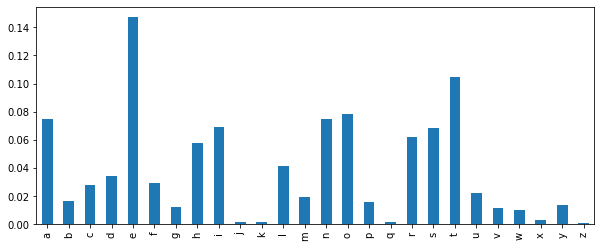

In [20]:
# We always compute in a cell, and plot in another cell!
# This avoids to re-compute everything when displaying the results
freq.plot( kind='bar')

It would be a good idea to sort the results before displaying them... Remember, internet is your friend here!

In [21]:
# your code here

<AxesSubplot:>

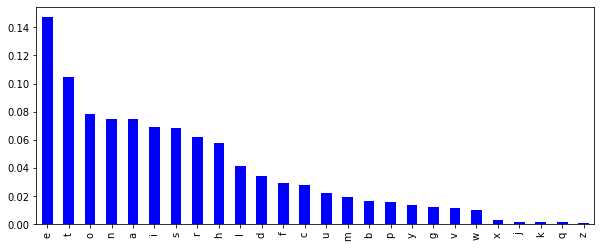

In [22]:
freq.sort_values(ascending=False, inplace=True) # inplace to modify freq (does not return a new series)
freq.plot( kind='bar', color='b')

### 1.2 Dataframes

The second important type in pandas is **DataFrames**. It is a list of series, or rather:

- A 2d array
- labels (for rows and columns)
- some extra informations

For instance, one could compare the statistics of the letters for different languages.

**Exercice**: The file FRconstitution.txt contains the French constitution. Record the US series in `freqUS`, and create the corresponding French series in `freqFR`.

In [23]:
# Your code here

In [24]:
# Solution
smallChar = [chr(i) for i in range(ord('a'), ord('z') + 1)]

def get_series(filename): # We create a function
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
    freq = pd.Series( [0]*26, index=smallChar )
    
    for c in text:
        if c in smallChar:
            freq[c] += 1
    freq /= sum(freq)
    return freq
        
freqUS = get_series("USconstitution.txt") # previous result
freqFR = get_series("FRconstitution.txt")

We can now create our DataFrame. First, we create a dictionnary (to record the "columns labels"), and we create our table as follows.

In [25]:
dictionnary = {"France": freqFR, "US": freqUS}
df = pd.DataFrame(dictionnary)

One can display the table by putting the variable name at the end of a cell (better than print here).

In [26]:
df

France        US
a  0.068595  0.074471
b  0.008861  0.016607
c  0.033541  0.027650
d  0.047404  0.034613
e  0.151145  0.147311
f  0.007476  0.029311
g  0.008122  0.012383
h  0.001975  0.057689
i  0.081590  0.069402
j  0.003230  0.001515
k  0.000000  0.001486
l  0.064091  0.041460
m  0.026508  0.019463
n  0.079431  0.074908
o  0.063851  0.078026
p  0.032968  0.016025
q  0.008676  0.001224
r  0.068687  0.061768
s  0.089879  0.068527
t  0.079578  0.104918
u  0.055655  0.021939
v  0.011962  0.011683
w  0.000000  0.009964
x  0.005870  0.002826
y  0.000683  0.013927
z  0.000222  0.000903

One can plot the information *column by column* with plot. Note how the labels are nicely taken into account.

<AxesSubplot:>

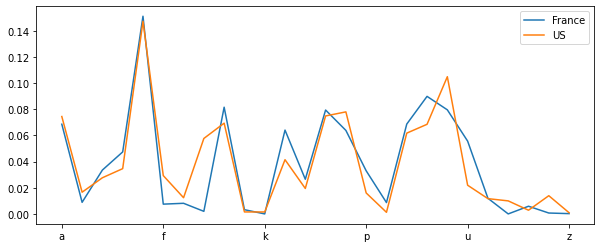

In [27]:
df.plot() # Compare with plot(df). 

**Exercice**: plot the previous statistic with "bars" (see documentation of plot)

<AxesSubplot:>

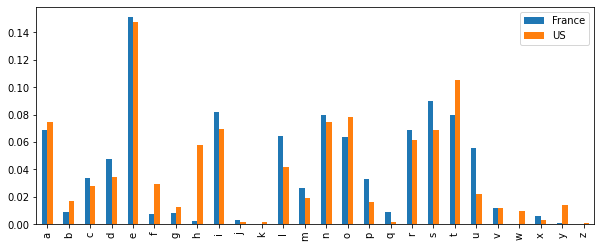

In [28]:
df.plot(kind='bar')

Now, we would like to add the frequency for Spain (in the file *ESconstitution.txt*). We can add a column as follows (the syntax is similar to dictionnaries)

In [29]:
freqES = get_series("ESconstitution.txt")

df["Spain"] = freqES
df

France        US     Spain
a  0.068595  0.074471  0.107181
b  0.008861  0.016607  0.011661
c  0.033541  0.027650  0.050891
d  0.047404  0.034613  0.058306
e  0.151145  0.147311  0.129139
f  0.007476  0.029311  0.006465
g  0.008122  0.012383  0.010380
h  0.001975  0.057689  0.003096
i  0.081590  0.069402  0.074878
j  0.003230  0.001515  0.003381
k  0.000000  0.001486  0.000000
l  0.064091  0.041460  0.061971
m  0.026508  0.019463  0.024058
n  0.079431  0.074908  0.070631
o  0.063851  0.078026  0.092055
p  0.032968  0.016025  0.027273
q  0.008676  0.001224  0.004093
r  0.068687  0.061768  0.072968
s  0.089879  0.068527  0.082850
t  0.079578  0.104918  0.049670
u  0.055655  0.021939  0.035565
v  0.011962  0.011683  0.007035
w  0.000000  0.009964  0.000000
x  0.005870  0.002826  0.001340
y  0.000683  0.013927  0.012219
z  0.000222  0.000903  0.002895

The labels of the lines are called `index` (as for Series), while the labels of the columns are called `columns`.

**Exercice**: The file *unknownText.txt* is written is an unknown language. Using the previous frequencies, have a guess (Hint: compute for instance the norm of | freqTXT - freqXX |...)



In [31]:
freqTXT = get_series("unkownText.txt")

for lang in df.columns:
    dist = norm(freqTXT - df[lang])
    print("for country = {:10}, dist = {:.6f}".format(lang, dist))
# The minimum is for France... it is probably a French text (you can open it to check)

for country = France    , dist = 0.035283
for country = US        , dist = 0.089207
for country = Spain     , dist = 0.082480


### An concrete example

Let us find some real Data to practice. We can for instance get Covid data. The up-to-date data can be found on github [ici](https://github.com/CSSEGISandData/COVID-19) (they are from Johns Hopkins University).

**Exercice** Find the *.csv* link for the raw data. We want the confirmed data in the world.

We then load the data with `read_csv`

In [45]:
source_data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
confirmed_url = source_data + "time_series_covid19_confirmed_global.csv"

data_covid = pd.read_csv( confirmed_url ) # load data
print("Data loaded.\nType data_covid = {}".format( type(data_covid)) )

Data loaded.
Type data_covid = <class 'pandas.core.frame.DataFrame'>


As expected we obtain a DataFrame. Let us have a look at it (we only print the first 10 lines).

In [46]:
data_covid.head(10)

Province/State       Country/Region       Lat        Long  \
0                           NaN          Afghanistan  33.93911   67.709953   
1                           NaN              Albania  41.15330   20.168300   
2                           NaN              Algeria  28.03390    1.659600   
3                           NaN              Andorra  42.50630    1.521800   
4                           NaN               Angola -11.20270   17.873900   
5                           NaN           Antarctica -71.94990   23.347000   
6                           NaN  Antigua and Barbuda  17.06080  -61.796400   
7                           NaN            Argentina -38.41610  -63.616700   
8                           NaN              Armenia  40.06910   45.038200   
9  Australian Capital Territory            Australia -35.47350  149.012400   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...   2/28/23  \
0        0        0        0        0        0        0  ...    209322   
1        0        0        0        0        0        0  ...    334391   
2        0        0        0        0        0        0  ...    271441   
3        0        0        0        0        0        0  ...     47866   
4        0        0        0        0        0        0  ...    105255   
5        0        0        0        0        0        0  ...        11   
6        0        0        0        0        0        0  ...      9106   
7        0        0        0        0        0        0  ...  10044125   
8        0        0        0        0        0        0  ...    446819   
9        0        0        0        0        0        0  ...    232018   

     3/1/23    3/2/23    3/3/23    3/4/23    3/5/23    3/6/23    3/7/23  \
0    209340    209358    209362    209369    209390    209406    209436   
1    334408    334408    334427    334427    334427    334427    334427   
2    271448    271463    271469    271469    271477    271477    271490   
3     47875     47875     47875     47875     47875     47875     47875   
4    105277    105277    105277    105277    105277    105277    105277   
5        11        11        11        11        11        11        11   
6      9106      9106      9106      9106      9106      9106      9106   
7  10044125  10044125  10044125  10044125  10044125  10044957  10044957   
8    446819    446819    446819    446819    446819    446819    446819   
9    232018    232619    232619    232619    232619    232619    232619   

     3/8/23    3/9/23  
0    209451    209451  
1    334443    334457  
2    271494    271496  
3     47890     47890  
4    105288    105288  
5        11        11  
6      9106      9106  
7  10044957  10044957  
8    447308    447308  
9    232619    232974  

[10 rows x 1147 columns]

We can extract Series with simple commands. For instance, the list of Countries.

In [47]:
list_countries = data_covid["Country/Region"]

print("list_countries is of type = {}\n".format ( type(list_countries) )) # a "series"

list_countries

list_countries is of type = <class 'pandas.core.series.Series'>



0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
               ...         
284      West Bank and Gaza
285    Winter Olympics 2022
286                   Yemen
287                  Zambia
288                Zimbabwe
Name: Country/Region, Length: 289, dtype: object

Let us clean this DataFrame (and learn throughout this process). For instance, assume we are only interested in the Data for France. We can extract a sub DataFrame as follows:

In [48]:
# we select the lines where Country/Region == France
data_France = data_covid[ data_covid["Country/Region"] == "France" ] 

data_France

Province/State Country/Region        Lat        Long  1/22/20  \
120              French Guiana         France   3.933900  -53.125800        0   
121           French Polynesia         France -17.679700  149.406800        0   
122                 Guadeloupe         France  16.265000  -61.551000        0   
123                 Martinique         France  14.641500  -61.024200        0   
124                    Mayotte         France -12.827500   45.166244        0   
125              New Caledonia         France -20.904305  165.618042        0   
126                    Reunion         France -21.115100   55.536400        0   
127           Saint Barthelemy         France  17.900000  -62.833300        0   
128  Saint Pierre and Miquelon         France  46.885200  -56.315900        0   
129                  St Martin         France  18.070800  -63.050100        0   
130          Wallis and Futuna         France -14.293800 -178.116500        0   
131                        NaN         France  46.227600    2.213700        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...   2/28/23    3/1/23  \
120        0        0        0        0        0  ...     98041     98041   
121        0        0        0        0        0  ...     77957     77957   
122        0        0        0        0        0  ...    201852    201852   
123        0        0        0        0        0  ...    228875    228875   
124        0        0        0        0        0  ...     42004     42004   
125        0        0        0        0        0  ...     80007     80007   
126        0        0        0        0        0  ...    494595    494595   
127        0        0        0        0        0  ...      5439      5439   
128        0        0        0        0        0  ...      3452      3452   
129        0        0        0        0        0  ...     12257     12257   
130        0        0        0        0        0  ...      3427      3427   
131        0        2        3        3        3  ...  38579269  38583794   

       3/2/23    3/3/23    3/4/23    3/5/23    3/6/23    3/7/23    3/8/23  \
120     98041     98041     98041     98041     98041     98041     98041   
121     77957     77957     77957     77957     77957     77957     78055   
122    201852    201852    201852    201852    201852    201852    201886   
123    228875    228875    228875    228875    228875    228875    229020   
124     42004     42004     42004     42004     42004     42004     42004   
125     80007     80007     80007     80007     80007     80007     80017   
126    494595    494595    494595    494595    494595    494595    494595   
127      5439      5439      5439      5439      5439      5439      5441   
128      3452      3452      3452      3452      3452      3452      3452   
129     12257     12257     12257     12257     12257     12257     12271   
130      3427      3427      3427      3427      3427      3427      3427   
131  38587990  38591184  38591184  38591184  38599330  38606393  38612201   

       3/9/23  
120     98041  
121     78055  
122    201886  
123    229020  
124     42004  
125     80017  
126    494595  
127      5441  
128      3452  
129     12271  
130      3427  
131  38618509  

[12 rows x 1147 columns]

Let us do some more cleaning.

In [49]:
# Put the Province/State as index (= labels for lines)
data_France.set_index("Province/State", inplace = True)

# We transpose to have the dates in Series
data_France = data_France.transpose()

# We drop unecessary data
data_France = data_France.drop(["Lat", "Long", "Country/Region"])
# This last operation can also be done with the useful iloc method

# print the result
data_France.head(10)

Province/State French Guiana French Polynesia Guadeloupe Martinique Mayotte  \
1/22/20                    0                0          0          0       0   
1/23/20                    0                0          0          0       0   
1/24/20                    0                0          0          0       0   
1/25/20                    0                0          0          0       0   
1/26/20                    0                0          0          0       0   
1/27/20                    0                0          0          0       0   
1/28/20                    0                0          0          0       0   
1/29/20                    0                0          0          0       0   
1/30/20                    0                0          0          0       0   
1/31/20                    0                0          0          0       0   

Province/State New Caledonia Reunion Saint Barthelemy  \
1/22/20                    0       0                0   
1/23/20                    0       0                0   
1/24/20                    0       0                0   
1/25/20                    0       0                0   
1/26/20                    0       0                0   
1/27/20                    0       0                0   
1/28/20                    0       0                0   
1/29/20                    0       0                0   
1/30/20                    0       0                0   
1/31/20                    0       0                0   

Province/State Saint Pierre and Miquelon St Martin Wallis and Futuna NaN  
1/22/20                                0         0                 0   0  
1/23/20                                0         0                 0   0  
1/24/20                                0         0                 0   2  
1/25/20                                0         0                 0   3  
1/26/20                                0         0                 0   3  
1/27/20                                0         0                 0   3  
1/28/20                                0         0                 0   4  
1/29/20                                0         0                 0   5  
1/30/20                                0         0                 0   5  
1/31/20                                0         0                 0   5

This is much better. Finally, we plot the results.

<AxesSubplot:>

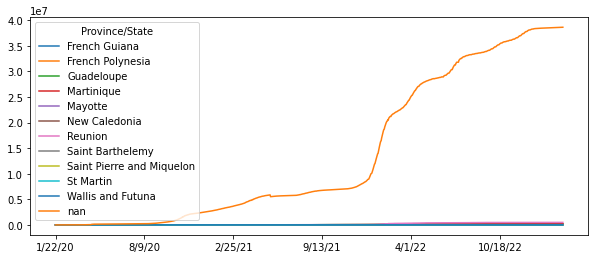

In [50]:
data_France.plot()

**Exercice**: Write a function get_series(nameCountry) which returns the (time)-serie for a given country name. The function should perform the sum of the Provinces (if any).

In [51]:
# your code here

In [52]:
def get_series(nameCountry):
    country_df = data_covid[ data_covid["Country/Region"] == nameCountry ]  #sub table
    country_series = sum(country_df.iloc[:,4:]) # iloc to remove Lat, Lon, etc.
    return country_series

In [53]:
# Let us plot the curves for several countries
Countries = ["France", "Germany", "Spain"]

# We create a table of clean data
clean_data = pd.DataFrame([get_series(country) for country in Countries], index=Countries)
clean_data = clean_data.transpose() # transpose

clean_data.head(10)

France  Germany  Spain
1/22/20       0        0      0
1/23/20       0        0      0
1/24/20       2        0      0
1/25/20       3        0      0
1/26/20       3        0      0
1/27/20       3        1      0
1/28/20       4        4      0
1/29/20       5        4      0
1/30/20       5        4      0
1/31/20       5        5      0

And we plot the results

<AxesSubplot:>

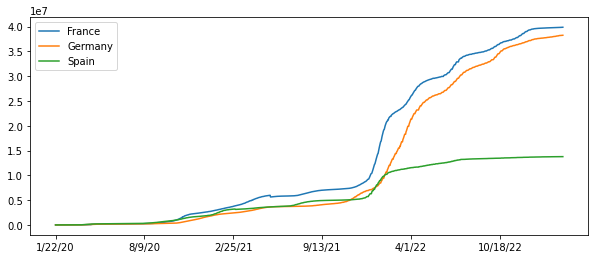

In [54]:
clean_data.plot()

**Exercice**: Display the "daily-case" for France. What do you think of this curve?

In [55]:
# your code here

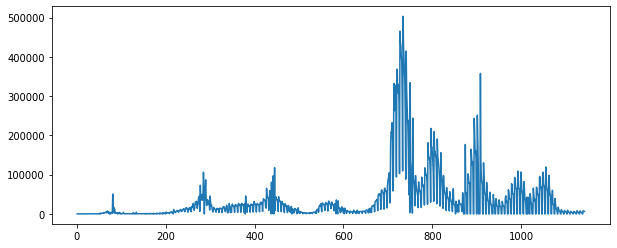

In [56]:
data_France = get_series("France")
daily_case = data_France.diff() # from cumulated cases to daily cases
daily_case = array( daily_case ) # we transform it to "array" to remove the "dates" label
daily_case[daily_case<0] = 0 # we remove negative values (we should not have negative values!)
plot(daily_case)

**Exercice**: Using the `polyfit` method, find the best polynomial of degree d which approximates the cumulated cases for France. Take $p \in [1, 2, 3, 4, 5, 6]$ and display the results with subplots.

In [57]:
# your code here

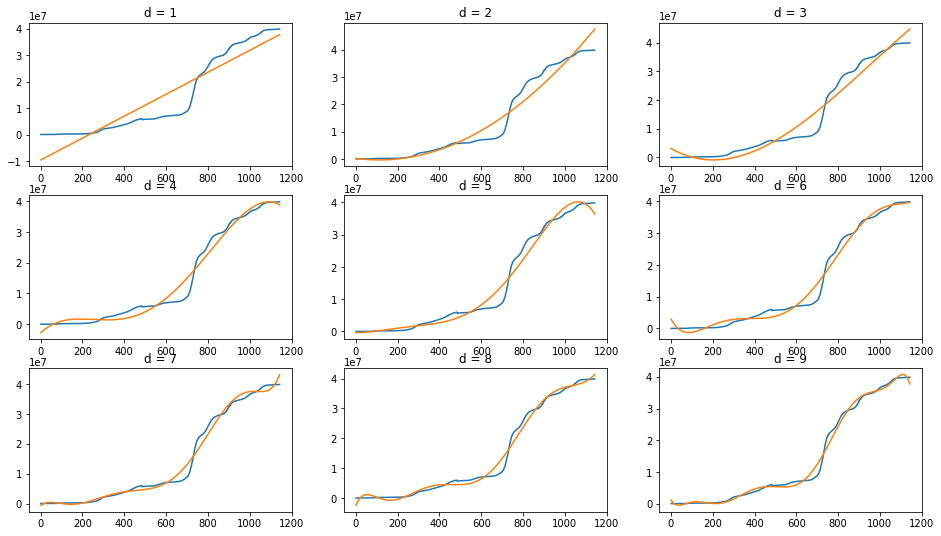

In [58]:
yy = array(data_France)
xx = linspace(1, len(yy), len(yy))

figsize(16, 9)
for d in range(1, 10):
    subplot(3, 3, d)
    P = polyfit(xx, yy, d)
    plot(xx, yy)
    title("d = {}".format(d))
    plot(xx, polyval(P, xx))